In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

df = pd.read_csv('ZonAnn.Ts+dSST_Zonal_annual_means.csv')
df.head()

,Year,Glob,NHem,SHem,24N-90N,24S-24N,90S-24S,64N-90N,44N-64N,24N-44N,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
0,1880,-0.17,-0.29,-0.04,-0.37,-0.12,-0.02,-0.80,-0.48,-0.29,-0.16,-0.09,-0.04,0.05,0.66
1,1881,-0.08,-0.18,0.01,-0.35,0.11,-0.07,-0.91,-0.43,-0.21,0.09,0.12,-0.05,-0.07,0.58
2,1882,-0.11,-0.22,-0.01,-0.31,-0.04,0.01,-1.41,-0.26,-0.17,-0.06,-0.03,0.01,0.04,0.61
3,1883,-0.17,-0.29,-0.06,-0.35,-0.16,-0.01,-0.19,-0.54,-0.28,-0.18,-0.14,-0.04,0.07,0.49
4,1884,-0.28,-0.43,-0.14,-0.60,-0.14,-0.14,-1.30,-0.62,-0.48,-0.13,-0.15,-0.19,-0.02,0.64


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     143 non-null    int64  
 1   Glob     143 non-null    float64
 2   NHem     143 non-null    float64
 3   SHem     143 non-null    float64
 4   24N-90N  143 non-null    float64
 5   24S-24N  143 non-null    float64
 6   90S-24S  143 non-null    float64
 7   64N-90N  143 non-null    float64
 8   44N-64N  143 non-null    float64
 9   24N-44N  143 non-null    float64
 10  EQU-24N  143 non-null    float64
 11  24S-EQU  143 non-null    float64
 12  44S-24S  143 non-null    float64
 13  64S-44S  143 non-null    float64
 14  90S-64S  143 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 16.9 KB


In [7]:
# Difference de temperatures entre 1880 et 2022

diff = df['Glob'][142] - df['Glob'][0]
print(diff)

1.06


In [ ]:
# Depuis la fin du XIXème siècle, la température mondiale a augmenté d'environ 1,1 °C.

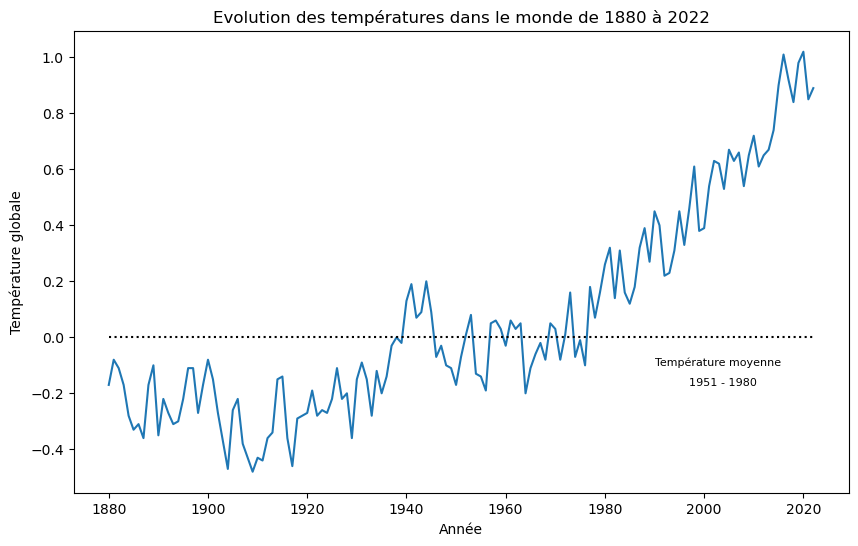

In [11]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

t = ax.set_title("Evolution des températures dans le monde de 1880 à 2022")
text = [ax.text(1990, -0.1 ,'Température moyenne', fontsize=8), ax.text(1997,-0.17 ,'1951 - 1980', fontsize=8)]

ax = sns.lineplot(x='Year', y='Glob', data=df)
ax = sns.lineplot(x='Year', y= 0, data = df, linestyle='dotted', color = 'black')
ax.set(xlabel='Année', ylabel='Température globale')

plt.show();

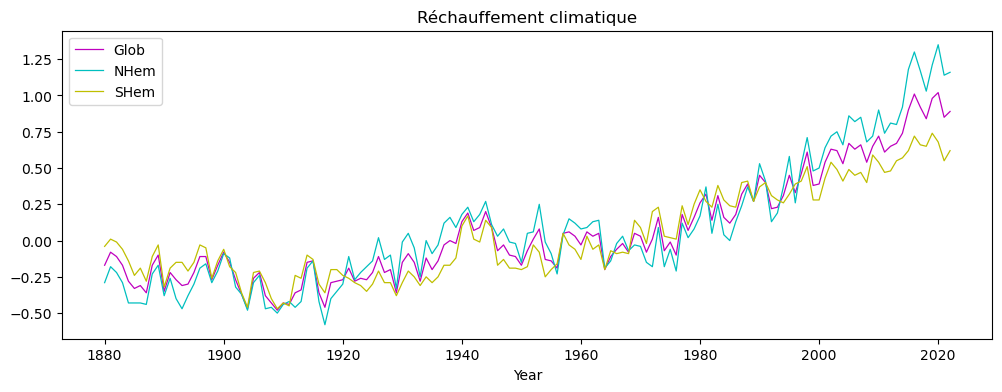

In [2]:
# Graphique - Réchauffement climatique

df.plot(x = 'Year', y = ['Glob','NHem','SHem'], style = ["m-", "c-", "y-"], title = "Réchauffement climatique", figsize=(12,4),
        linewidth = 0.9);

In [ ]:
# Conclusion : mêmes variations, mais différentes amplitudes

,Year,Glob,N.Hemi,S.Hemi,24N-90N,24S-24N,90S-24S,64N-90N,44N-64N,24N-44N,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
0,2003,0.031,-0.122,0.183,-0.318,0.189,0.168,-0.970,-0.030,-0.292,0.171,0.206,-0.013,0.385,0.277
1,2004,-0.066,-0.146,0.014,-0.288,0.019,0.042,-1.365,-0.047,-0.089,0.067,-0.028,-0.005,0.174,-0.081
2,2005,0.073,0.040,0.105,-0.002,0.111,0.096,-0.170,0.301,-0.148,0.104,0.118,-0.086,0.145,0.543
3,2006,-0.032,-0.038,-0.026,-0.048,-0.068,0.032,-0.211,0.039,-0.051,-0.022,-0.113,-0.038,0.074,0.161
4,2007,-0.029,-0.016,-0.042,0.055,-0.118,0.006,0.095,0.200,-0.055,-0.121,-0.114,-0.108,-0.021,0.404


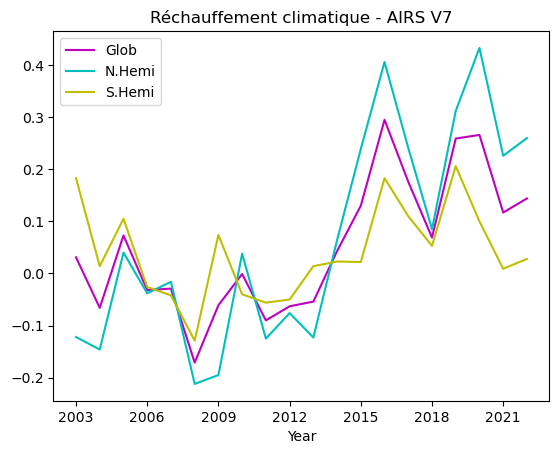

In [3]:
# Graphique - Réchauffement climatique (entre 2002 et aujourd'hui)
# Utilisation des données satellitaires (AIRS V7)

df_sat = pd.read_csv('ZonAnn.Ts+dSST_AIRS.csv', header=1, skiprows = lambda x: x not in range(22, 44))
display(df_sat.head())

df_sat['Year'].dtype
## dtype('int64')

ax = df_sat.plot(x = 'Year', y = ['Glob','N.Hemi','S.Hemi'], style = ["m-", "c-", "y-"], title = "Réchauffement climatique - AIRS V7")
ax.set_xticks(np.arange(2003, 2022, 3));

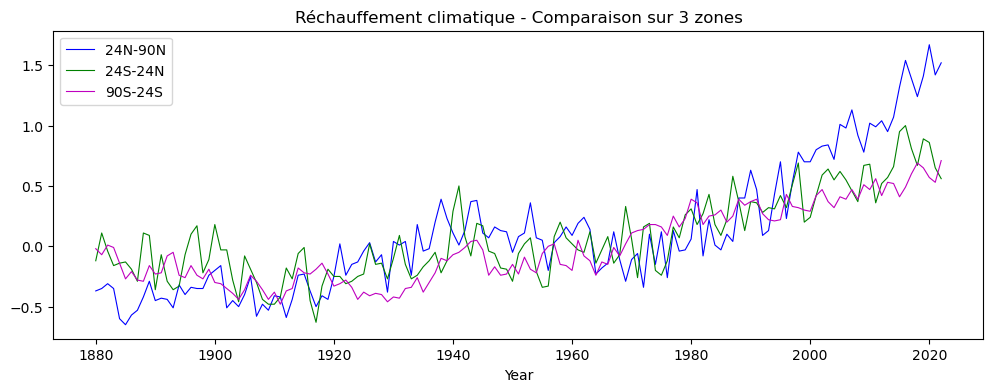

In [4]:
# Graphique - Etude du réchauffement climatique - Comparaison entre les différentes latitudes
# Y-a-t-il des zones plus impactées que d'autres ?

df.plot(x = 'Year', y = ['24N-90N', '24S-24N', '90S-24S'], style = ["b-", "g-", "m-"], 
        title = "Réchauffement climatique - Comparaison sur 3 zones", figsize=(12,4),
       linewidth = 0.8);

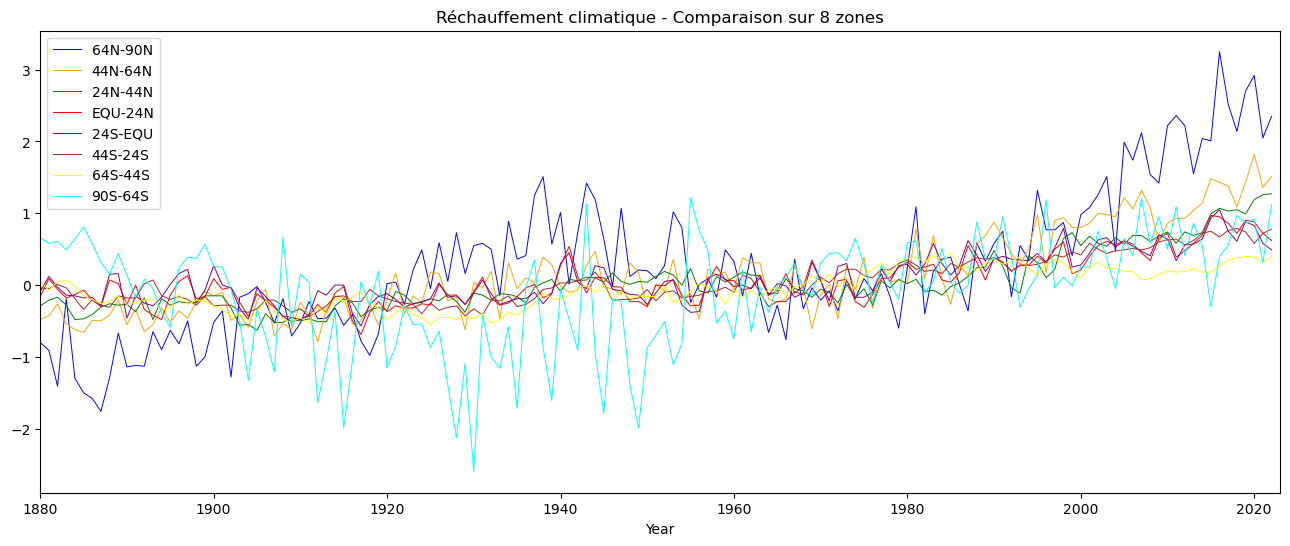

In [5]:
# Graphique - Etude du réchauffement climatique - Comparaison entre les différentes latitudes
# Y-a-t-il des zones plus impactées que d'autres ?

df.plot(x = 'Year', y = ['64N-90N', '44N-64N', '24N-44N', 'EQU-24N', '24S-EQU','44S-24S', '64S-44S','90S-64S'], 
        color = ["blue", "orange", "green", "red", "purple", "brown", "yellow", "cyan"], 
        linewidth = 0.7,
        title = "Réchauffement climatique - Comparaison sur 8 zones",
       figsize=(16,6),
       xlim=(1880,2023))
ax.legend(fontsize=8, loc='upper left');

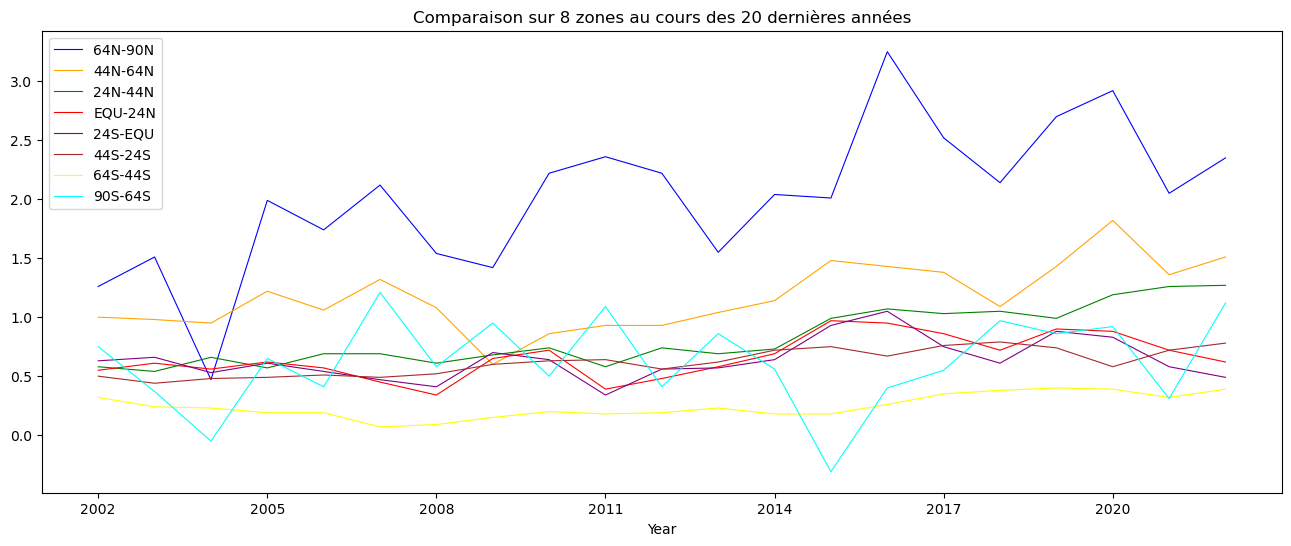

In [6]:
# Graphique - Comparaison entre les différentes latitudes - Zoom sur les 20 dernières années

df_zoom_20 = df.loc[df['Year'] >= 2002]

ax = df_zoom_20.plot(x = 'Year', y = ['64N-90N', '44N-64N', '24N-44N', 'EQU-24N', '24S-EQU','44S-24S', '64S-44S','90S-64S'], 
        color = ["blue", "orange", "green", "red", "purple", "brown", "yellow", "cyan"], 
        linewidth = 0.8,
        title = "Comparaison sur 8 zones au cours des 20 dernières années",
                figsize=(16,6))
ax.set_xticks(np.arange(2002, 2023, 3))
ax.legend(fontsize=10, loc='upper left');

In [29]:
# Conclusion : Les pôles et l'hémisphère nord sont les zones les plus impactés par le réchauffement climatique.

In [17]:
from bokeh.plotting import figure, show, output_notebook
output_notebook()
from bokeh.models import LabelSet, ColumnDataSource
from bokeh.models.tools import HoverTool

p = figure(plot_width = 950, plot_height = 600, title="Comparaison sur 8 zones au cours des 20 dernières années")

source = ColumnDataSource(df_zoom_20)

p.line(x = 'Year', y = '64N-90N', color = "blue", legend_label = "64N-90N", source = source)
p.line(x = 'Year', y = '44N-64N', color = "orange", legend_label = "44N-64N", source = source)
p.line(x = 'Year', y = '24N-44N', color = "green", legend_label = "24N-44N", source = source)
p.line(x = 'Year', y = 'EQU-24N', color = "red", legend_label = "EQU-24N", source = source)
p.line(x = 'Year', y = '24S-EQU', color = "purple", legend_label = "24S-EQU", source = source)
p.line(x = 'Year', y = '44S-24S', color = "brown", legend_label = "44S-24S", source = source)
p.line(x = 'Year', y = '64S-44S', color = "yellow", legend_label = "64S-44S", source = source)
p.line(x = 'Year', y = '90S-64S', color = "cyan", legend_label = "90S-64S", source = source)

hover = HoverTool(tooltips = [("Year", "@Year"), ("Value", "$y")])
p.add_tools(hover)

p.xaxis.axis_label = "Année"

p.legend.title = 'Latitudes'
p.legend.title_text_font_size = '8pt'
p.legend.click_policy = 'hide'
p.legend.location = 'top_left'
p.legend.label_text_font_size = "7pt"
p.legend.label_height = 5
p.legend.label_width = 20

show(p)

Loading BokehJS ...

In [14]:
# Graphique - Carte illustrant les anomalies des températures suivant les différentes latitudes
# (écart de la température de la moyenne des 10 dernieres annees par rapport à la moyenne 1951 - 1980)

moy_10_64N_90N = df.loc[df['Year'] > 2012, '64N-90N'].mean()
moy_10_44N_64N = df.loc[df['Year'] > 2012, '44N-64N'].mean()
moy_10_24N_44N = df.loc[df['Year'] > 2012, '24N-44N'].mean()
moy_10_EQU_24N = df.loc[df['Year'] > 2012, 'EQU-24N'].mean()
moy_10_24S_EQU = df.loc[df['Year'] > 2012, '24S-EQU'].mean()
moy_10_44S_24S = df.loc[df['Year'] > 2012, '44S-24S'].mean()
moy_10_64S_44S = df.loc[df['Year'] > 2012, '64S-44S'].mean()
moy_10_90S_64S = df.loc[df['Year'] > 2012, '90S-64S'].mean()

print(moy_10_64N_90N, moy_10_44N_64N, moy_10_24N_44N, moy_10_EQU_24N, moy_10_24S_EQU, moy_10_44S_24S, moy_10_64S_44S, moy_10_90S_64S)

2.3530000000000006 1.3679999999999999 1.027 0.789 0.7330000000000001 0.713 0.308 0.6239999999999999


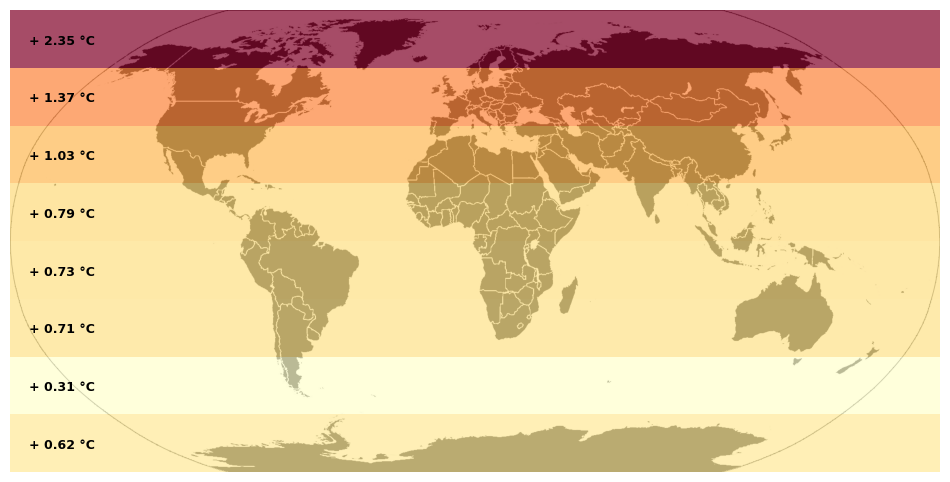

In [16]:
moyenne = np.array([[moy_10_64N_90N], [moy_10_44N_64N], [moy_10_24N_44N], [moy_10_EQU_24N], 
                   [moy_10_24S_EQU], [moy_10_44S_24S], [moy_10_64S_44S], [moy_10_90S_64S]])

fig, ax = plt.subplots(figsize=(12,6))

import matplotlib.image as mpimg 
map_img = mpimg.imread('carte_monde_2.png') 

labels = (np.asarray(["+ {0:.2f} °C".format(value)
                      for value in moyenne.flatten()])).reshape(8, 1)

htmp = sns.heatmap(moyenne, fmt="", alpha = 0.7, zorder = 2, cmap = 'YlOrRd', ax=ax, cbar=False)

for y in range(labels.shape[0]):
    for x in range(labels.shape[1]):
        ax.text(x+0.02, y + 0.6, labels[y, x], color = 'black', weight='bold', fontsize=9)

htmp.imshow(map_img,
          aspect = htmp.get_aspect(),
          extent = htmp.get_xlim() + htmp.get_ylim(),
          zorder = 1)

plt.axis('off')

from matplotlib.pyplot import show 
show()

In [ ]:
# Commentaire : 
# Encore une fois, on observe que les pôles et l'hémisphère nord sont les zones les plus impactés par le réchauffement climatique.